In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
curr_dir = !pwd
my_path = curr_dir[0]+"/hmm_domains/"
with open(my_path+'zinc_hmm_states_dict.pik', 'rb') as handle:
    states_dict = pickle.load(handle)

In [3]:
avg_af_dict = {}
avg_af_adj_dict = {}
for state in states_dict.keys():
    af_sum = 0
    af_adj_sum = 0
    for d in states_dict[state]:
        af_sum += d["af"]
        af_adj_sum += d["af_adj"]
    af_avg = af_sum/float(len(states_dict[state]))
    af_adj_avg = af_adj_sum/float(len(states_dict[state]))
    avg_af_dict[state] = af_avg
    avg_af_adj_dict[state] = af_adj_avg

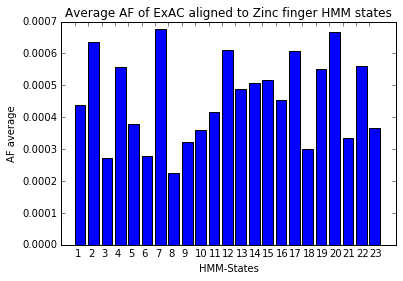

In [4]:
plt.bar(avg_af_dict.keys(), avg_af_dict.values())
plt.xticks(np.arange(1,24), avg_af_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average AF of ExAC aligned to Zinc finger HMM states")
plt.show()

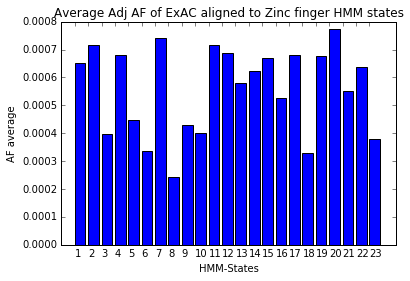

In [5]:
plt.bar(avg_af_adj_dict.keys(), avg_af_adj_dict.values())
plt.xticks(np.arange(1,24), avg_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average Adj AF of ExAC aligned to Zinc finger HMM states")
plt.show()

In [6]:
states_af_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_af_dict[state].append(d["af"])

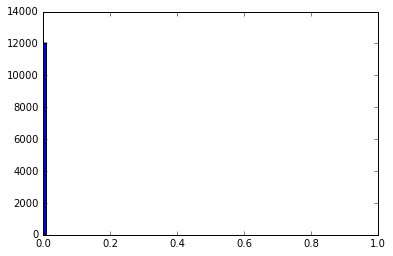

In [16]:
(n, bins, patches) = plt.hist(states_af_dict[7], bins=100, range=(0,1))
plt.show()

In [19]:
n[1]

4.0

In [8]:
max(states_af_dict[5])

0.739

Installed pymed-0.2.0 from: https://github.com/garydoranjr/pyemd

In [9]:
from sklearn.metrics.pairwise import euclidean_distances
from pyemd import emd

emd_dict = {}
for state in states_af_dict.keys():
    first_signature = np.array(states_af_dict[state], dtype=float)
    second_signature = np.array([0] * len(states_af_dict[state]), dtype=float)
    distance_matrix = euclidean_distances(first_signature.reshape(-1, 1), second_signature.reshape(-1, 1))
    emd_dict[state] = emd(first_signature, second_signature, distance_matrix)

In [10]:
emd_dict

{1: 5.258372179002081,
 2: 7.616589902868068,
 3: 2.1636785837095305,
 4: 6.632987093720057,
 5: 3.389158958692026,
 6: 2.9303677742500196,
 7: 8.086957002707983,
 8: 1.7770711234500078,
 9: 3.7773614046080244,
 10: 4.337111139408035,
 11: 4.222734328472041,
 12: 6.86040015159106,
 13: 5.629526510751045,
 14: 6.066672183101051,
 15: 6.18798627657507,
 16: 5.4387123223250615,
 17: 5.321063505775033,
 18: 3.5251355535720252,
 19: 5.596009368715372,
 20: 6.478632197135027,
 21: 3.0260731172641355,
 22: 6.086429624968022,
 23: 4.360375348119035}

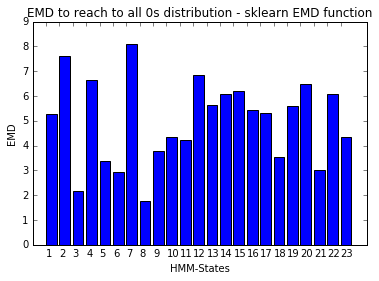

In [30]:
plt.bar(emd_dict.keys(), emd_dict.values())
plt.xticks(np.arange(1,24), avg_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("EMD")
plt.title("EMD to reach to all 0s distribution - sklearn EMD function")
plt.show()

Computing the EMD for one-dimensional array of bins:
https://en.wikipedia.org/wiki/Earth_mover%27s_distance#Computing_the_EMD

In [26]:
def calc_emd(first_dist, second_dist, bins_num):
    
    #Create a histogram for the teo distributions
    (first_hist, first_bin_edges) = np.histogram(first_dist, bins=bins_num, range=(0,1))
    (second_hist, second_bin_edges) = np.histogram(second_dist, bins=bins_num, range=(0,1))
    
    #Compute EMD
    total_distance = 0
    last_dirt = 0
    for i in range(bins_num):
        new_dirt = (first_hist[i] + last_dirt) - second_hist[i]
        last_dirt = new_dirt
        total_distance += abs(new_dirt)
    
    return total_distance

In [27]:
new_emd_dict = {}

for state in states_af_dict.keys():
    new_emd_dict[state] = calc_emd(states_af_dict[state], [0] * len(states_af_dict[state]), 100)

In [31]:
new_emd_dict

{1: 496,
 2: 736,
 3: 305,
 4: 635,
 5: 435,
 6: 307,
 7: 783,
 8: 248,
 9: 364,
 10: 411,
 11: 472,
 12: 703,
 13: 557,
 14: 578,
 15: 594,
 16: 517,
 17: 693,
 18: 336,
 19: 638,
 20: 765,
 21: 375,
 22: 640,
 23: 415}

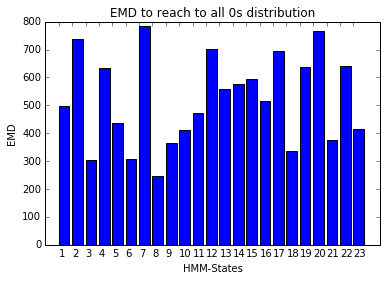

In [29]:
plt.bar(new_emd_dict.keys(), new_emd_dict.values())
plt.xticks(np.arange(1,24), avg_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("EMD")
plt.title("EMD to reach to all 0s distribution")
plt.show()